In [18]:
import pathlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(14,8)})

### Real data (model, grid)

In [2]:
real_files = pathlib.Path('data/real_full/').glob('real*')

real_dfs = [pd.read_csv(file) for file in real_files]

In [3]:
real_per_day = pd.concat(real_dfs)
real_per_day['day'] = pd.to_datetime(real_per_day['day'],  format='%d/%m/%Y')

In [4]:
real_per_day = real_per_day.set_index('day')
real_per_day = real_per_day.groupby(real_per_day.index).agg({'T_MEAN': 'mean'})

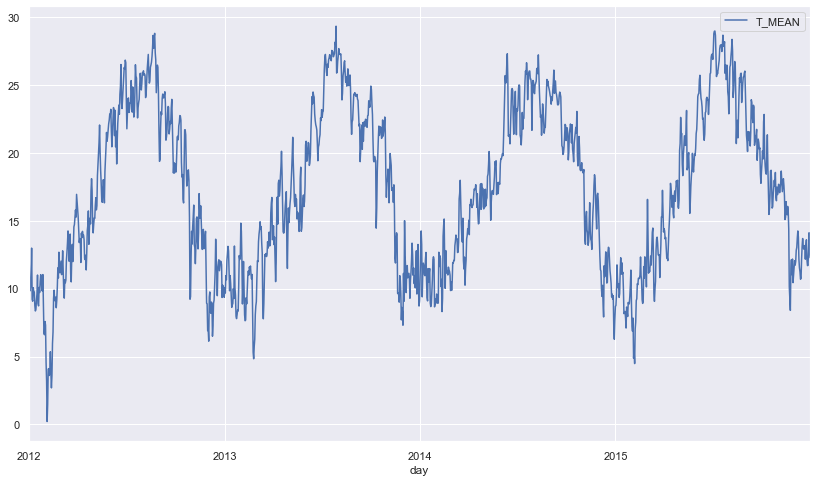

In [19]:
real_per_day.plot()

### Official stations

In [6]:
stations_xls = pd.ExcelFile('data/data_S2_S3_S4.xlsx')

In [7]:
stations_dfs = [stations_xls.parse(sheet) for sheet in stations_xls.sheet_names]

In [8]:
stations_df = pd.concat(stations_dfs)

/home/biel/.conda/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
stations_df['DATA'] = pd.to_datetime(stations_df['DATA'], format="%Y-%m-%d")

In [10]:
stations_df.head()

,CODI,COMARCA,DATA,DVum10,DVum6,DVx10,DVx6,ESTACIO,HRm,PPT24h,RS24h,Tm,Tn,Tx,VVem10,VVem6,VVx10,VVx6,hPa
0,WU,Barcelonès,2005-09-22,NaN,223.0,NaN,NaN,Badalona - Museu,72.0,0.0,19.5,19.8,15.0,22.9,NaN,NaN,NaN,8.3,NaN
1,WU,Barcelonès,2005-09-23,NaN,220.0,NaN,NaN,Badalona - Museu,77.0,0.0,14.5,21.3,18.2,23.9,NaN,NaN,NaN,7.9,1012.3
2,WU,Barcelonès,2005-09-24,NaN,195.0,NaN,NaN,Badalona - Museu,80.0,0.0,17.0,21.9,19.1,23.5,NaN,NaN,NaN,5.9,1011.8
3,WU,Barcelonès,2005-09-25,NaN,254.0,NaN,NaN,Badalona - Museu,80.0,11.4,11.1,21.0,16.7,24.6,NaN,NaN,NaN,12.0,1009.7
4,WU,Barcelonès,2005-09-26,NaN,11.0,NaN,NaN,Badalona - Museu,74.0,0.2,15.3,19.7,16.8,22.9,NaN,NaN,NaN,6.6,1015.2


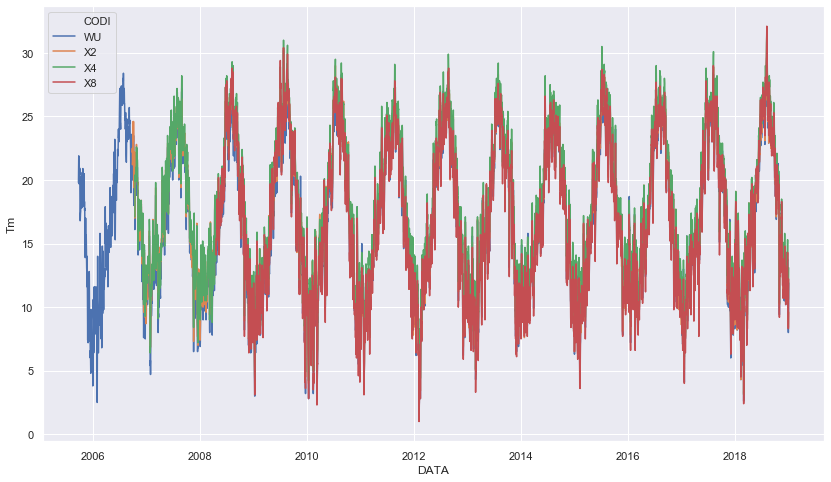

In [20]:
sns.lineplot(x='DATA', y='Tm', hue='CODI', data=stations_df)

In [12]:
stations_grouped_by_code = stations_df.groupby('DATA').agg({'Tm':'mean'})

In [13]:
stations_overlaping_real = stations_grouped_by_code.loc[real_per_day.index.min():real_per_day.index.max()]

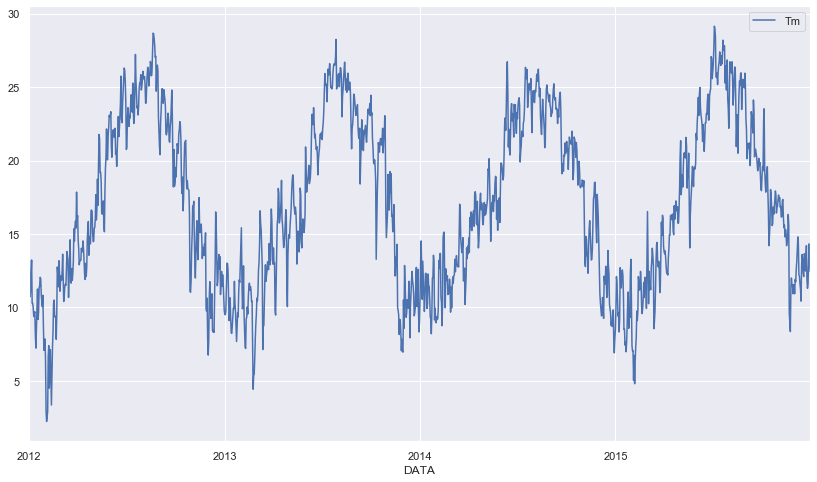

In [21]:
ax1 = stations_overlaping_real.plot()

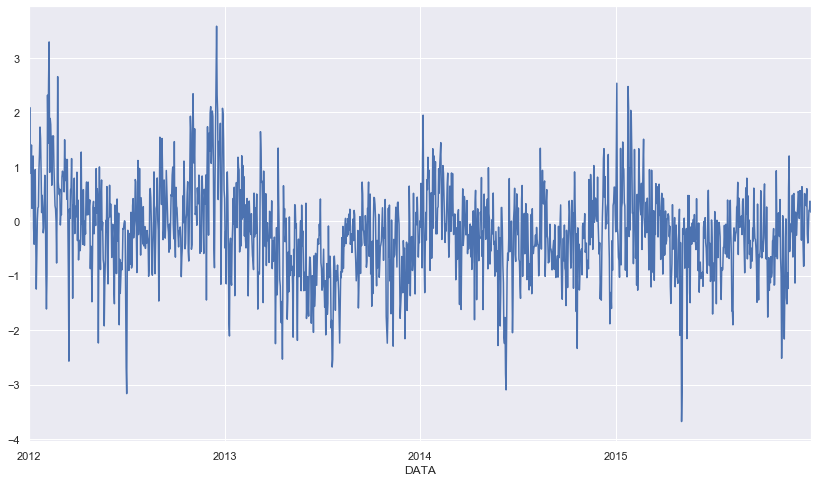

In [22]:
(stations_overlaping_real['Tm'] - real_per_day['T_MEAN']).plot()

In [16]:
df_all = real_per_day.join(stations_overlaping_real)

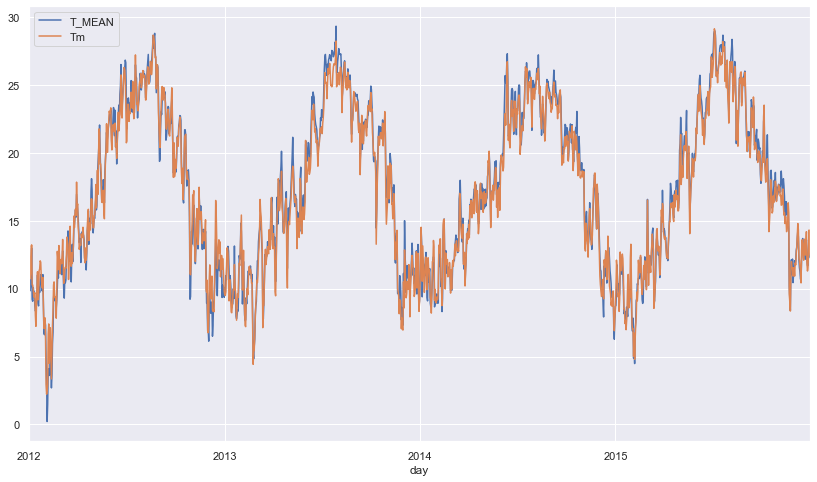

In [23]:
df_all.plot()

## NonOfficial stations

In [24]:
nonofficial_xls = pd.ExcelFile('data/data_NoOfficial.xlsx')

In [28]:
nonofficial_df = nonofficial_xls.parse('Sheet1', index_col=0)